In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("./full_data.csv")

In [3]:
df = df.drop(columns=["filename"])

# Down Sampling:

In [ ]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]
value_counts = df['kelas'].value_counts()
total_count = df.shape[0]
class_counts = []
for i in value_counts:
    class_counts.append(i)
excludeColumn = value_counts.idxmin()
columnSaved = value_counts[value_counts.index!=excludeColumn].index
minorityClass = df[df.kelas == excludeColumn].index
selected_examples = []
for col in columnSaved:
  major = df[df.kelas == col].index
  num_examples = min(class_counts)
  
  # Loop through each class
  class_examples = np.random.choice(major, size=num_examples, replace=False)
    
    # Add the selected examples to the list
  selected_examples.extend(class_examples)
  print("Total of",col,":",len(class_examples))
undersampleIndices = np.concatenate([minorityClass,selected_examples])
df = df.loc[undersampleIndices]

Total of FNSZ : 230
Total of GNSZ : 230


In [ ]:
df.kelas.value_counts()

CPSZ    230
FNSZ    230
GNSZ    230
Name: kelas, dtype: int64

# Tanpa downsampling:

In [4]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]

# Label Encoding: 

In [5]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['kelas']= label_encoder.fit_transform(df['kelas'])
le_name_mapping = dict(zip(label_encoder.classes_, 
                            label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

df['kelas'].unique()

{'CPSZ': 0, 'FNSZ': 1, 'GNSZ': 2}


array([1, 2, 0])

In [6]:
y = df['kelas']
x = df.drop(columns='kelas') #siapkan x dan y

# Over sampling:

In [7]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

# data splitting:

In [8]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state = 0)

# KNN:

## Euclidean:

In [9]:
def euclidean_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='euclidean').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.847255369928401
              precision    recall  f1-score   support

        CPSZ       0.84      0.88      0.86       266
        FNSZ       0.88      0.78      0.83       289
        GNSZ       0.83      0.89      0.86       283

    accuracy                           0.85       838
   macro avg       0.85      0.85      0.85       838
weighted avg       0.85      0.85      0.85       838



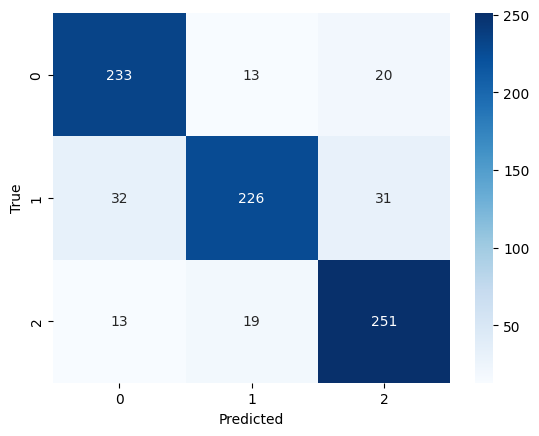


Nilai n =  3
Accuracy: 0.7386634844868735
              precision    recall  f1-score   support

        CPSZ       0.74      0.82      0.78       266
        FNSZ       0.76      0.55      0.64       289
        GNSZ       0.72      0.85      0.78       283

    accuracy                           0.74       838
   macro avg       0.74      0.74      0.73       838
weighted avg       0.74      0.74      0.73       838



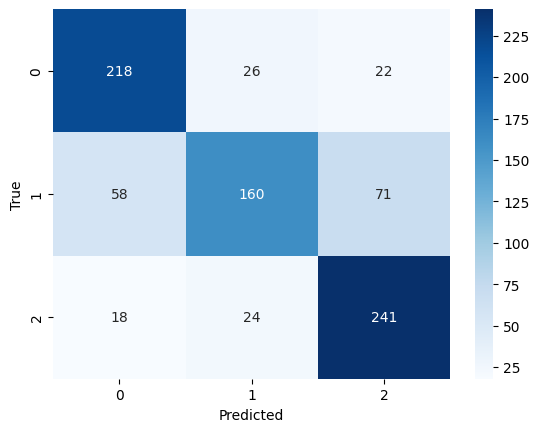


Nilai n =  5
Accuracy: 0.698090692124105
              precision    recall  f1-score   support

        CPSZ       0.70      0.80      0.75       266
        FNSZ       0.70      0.51      0.59       289
        GNSZ       0.69      0.80      0.74       283

    accuracy                           0.70       838
   macro avg       0.70      0.70      0.69       838
weighted avg       0.70      0.70      0.69       838



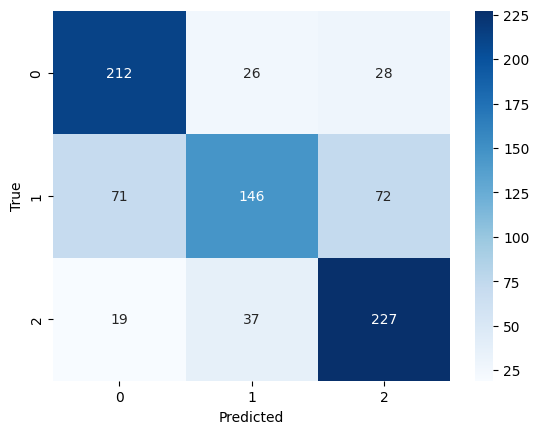


Nilai n =  7
Accuracy: 0.652744630071599
              precision    recall  f1-score   support

        CPSZ       0.66      0.73      0.70       266
        FNSZ       0.64      0.48      0.55       289
        GNSZ       0.65      0.76      0.70       283

    accuracy                           0.65       838
   macro avg       0.65      0.66      0.65       838
weighted avg       0.65      0.65      0.65       838



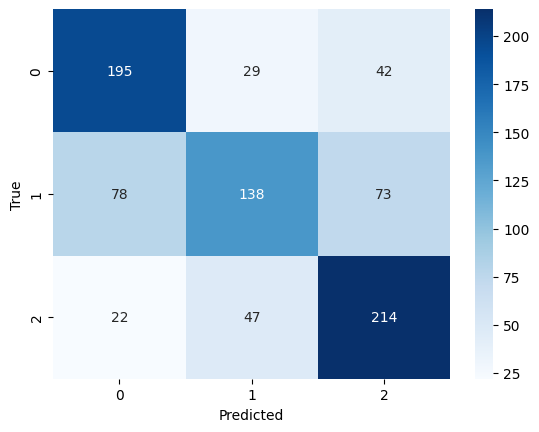


Nilai n =  9
Accuracy: 0.6431980906921241
              precision    recall  f1-score   support

        CPSZ       0.66      0.73      0.69       266
        FNSZ       0.63      0.45      0.52       289
        GNSZ       0.64      0.76      0.69       283

    accuracy                           0.64       838
   macro avg       0.64      0.65      0.64       838
weighted avg       0.64      0.64      0.63       838



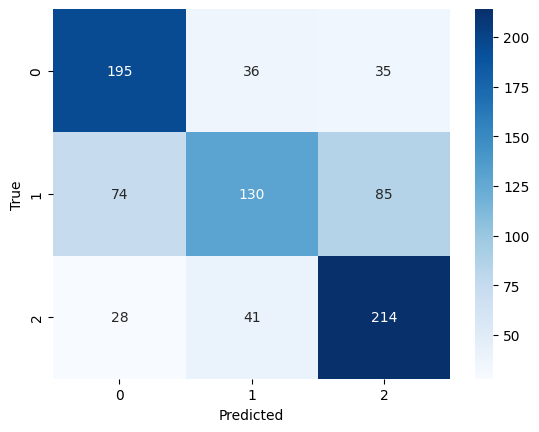

In [10]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = euclidean_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Cosine:

In [11]:
def cosine_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='cosine').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.6742243436754176
              precision    recall  f1-score   support

        CPSZ       0.63      0.65      0.64       266
        FNSZ       0.68      0.71      0.70       289
        GNSZ       0.71      0.66      0.68       283

    accuracy                           0.67       838
   macro avg       0.67      0.67      0.67       838
weighted avg       0.68      0.67      0.67       838



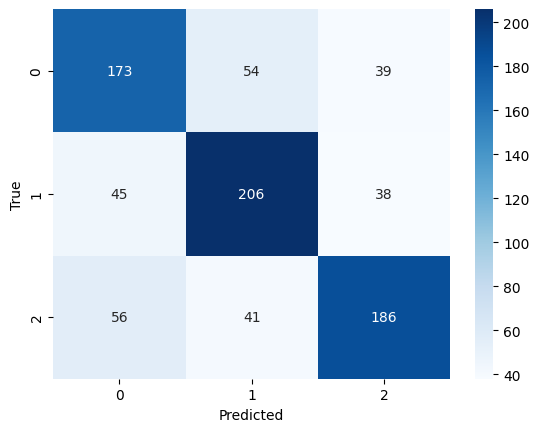


Nilai n =  3
Accuracy: 0.5656324582338902
              precision    recall  f1-score   support

        CPSZ       0.55      0.70      0.61       266
        FNSZ       0.54      0.45      0.49       289
        GNSZ       0.61      0.56      0.58       283

    accuracy                           0.57       838
   macro avg       0.57      0.57      0.56       838
weighted avg       0.57      0.57      0.56       838



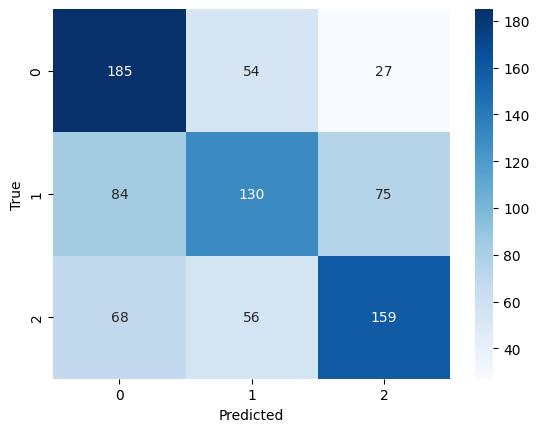


Nilai n =  5
Accuracy: 0.5465393794749404
              precision    recall  f1-score   support

        CPSZ       0.54      0.69      0.60       266
        FNSZ       0.53      0.46      0.49       289
        GNSZ       0.58      0.50      0.54       283

    accuracy                           0.55       838
   macro avg       0.55      0.55      0.54       838
weighted avg       0.55      0.55      0.54       838



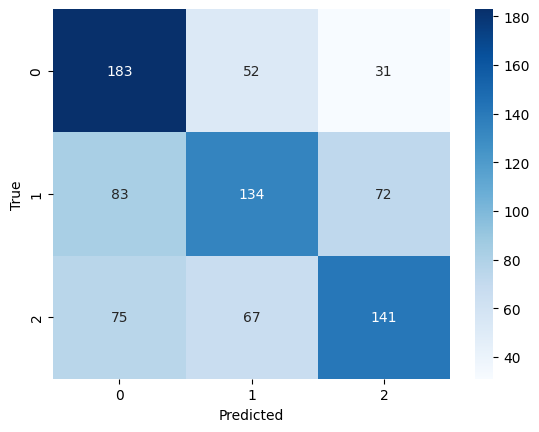


Nilai n =  7
Accuracy: 0.5477326968973747
              precision    recall  f1-score   support

        CPSZ       0.53      0.64      0.58       266
        FNSZ       0.57      0.47      0.51       289
        GNSZ       0.55      0.54      0.55       283

    accuracy                           0.55       838
   macro avg       0.55      0.55      0.55       838
weighted avg       0.55      0.55      0.55       838



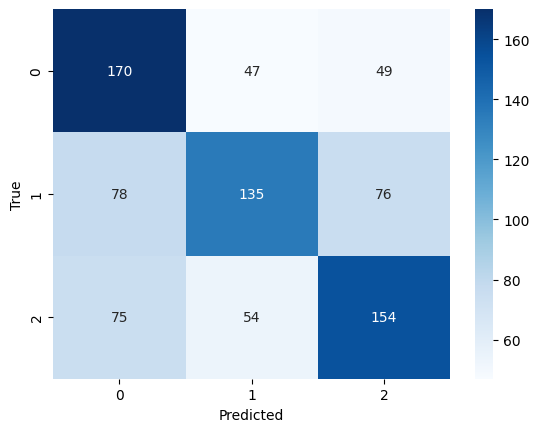


Nilai n =  9
Accuracy: 0.5119331742243437
              precision    recall  f1-score   support

        CPSZ       0.51      0.61      0.56       266
        FNSZ       0.50      0.40      0.45       289
        GNSZ       0.52      0.53      0.52       283

    accuracy                           0.51       838
   macro avg       0.51      0.51      0.51       838
weighted avg       0.51      0.51      0.51       838



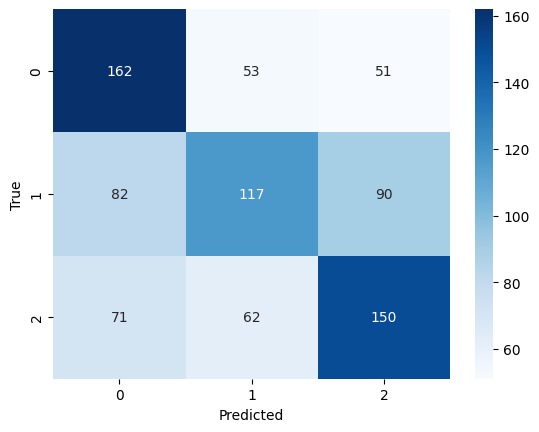

In [12]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = cosine_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Cityblock:

In [13]:
def cityblock_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='cityblock').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.8591885441527446
              precision    recall  f1-score   support

        CPSZ       0.84      0.88      0.86       266
        FNSZ       0.89      0.80      0.84       289
        GNSZ       0.85      0.89      0.87       283

    accuracy                           0.86       838
   macro avg       0.86      0.86      0.86       838
weighted avg       0.86      0.86      0.86       838



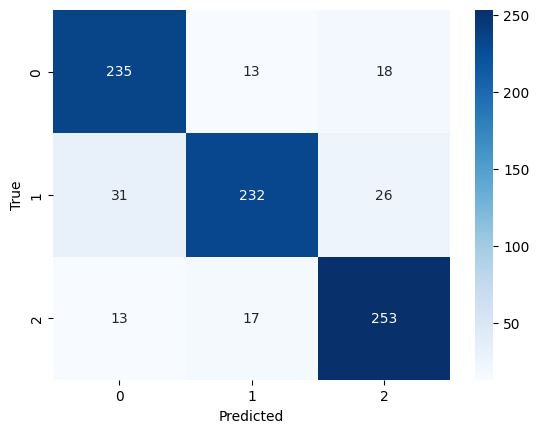


Nilai n =  3
Accuracy: 0.7362768496420048
              precision    recall  f1-score   support

        CPSZ       0.74      0.82      0.78       266
        FNSZ       0.76      0.56      0.65       289
        GNSZ       0.72      0.83      0.77       283

    accuracy                           0.74       838
   macro avg       0.74      0.74      0.73       838
weighted avg       0.74      0.74      0.73       838



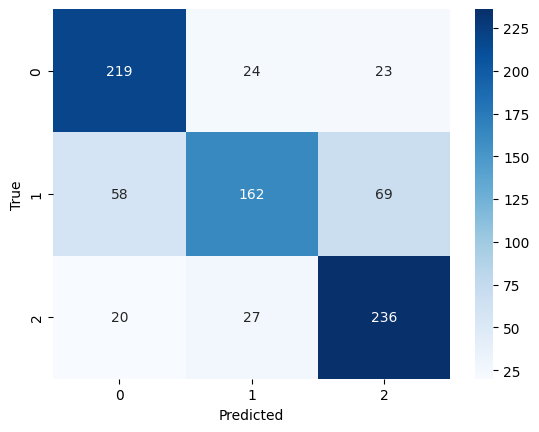


Nilai n =  5
Accuracy: 0.7124105011933174
              precision    recall  f1-score   support

        CPSZ       0.71      0.81      0.76       266
        FNSZ       0.75      0.50      0.60       289
        GNSZ       0.69      0.83      0.76       283

    accuracy                           0.71       838
   macro avg       0.72      0.72      0.71       838
weighted avg       0.72      0.71      0.70       838



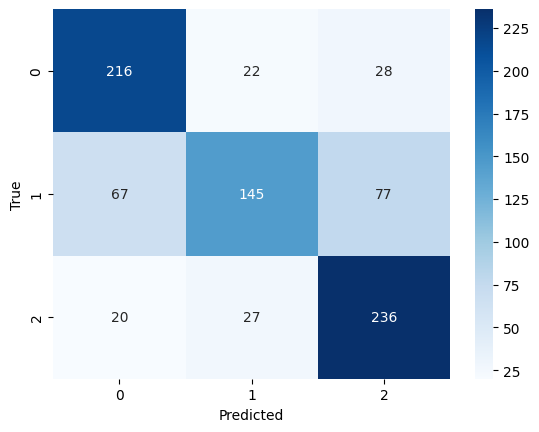


Nilai n =  7
Accuracy: 0.6813842482100239
              precision    recall  f1-score   support

        CPSZ       0.69      0.75      0.72       266
        FNSZ       0.69      0.49      0.57       289
        GNSZ       0.66      0.81      0.73       283

    accuracy                           0.68       838
   macro avg       0.68      0.68      0.68       838
weighted avg       0.68      0.68      0.67       838



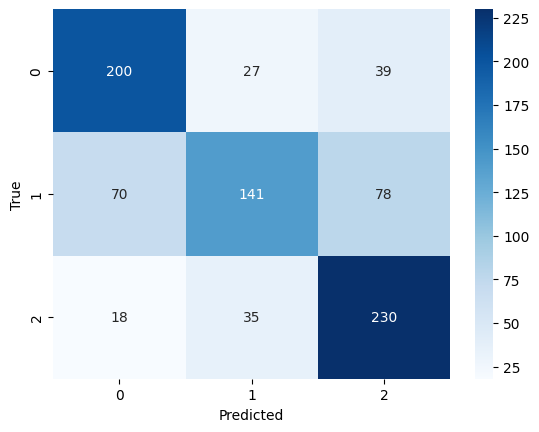


Nilai n =  9
Accuracy: 0.6443914081145584
              precision    recall  f1-score   support

        CPSZ       0.65      0.73      0.69       266
        FNSZ       0.64      0.44      0.52       289
        GNSZ       0.64      0.77      0.70       283

    accuracy                           0.64       838
   macro avg       0.64      0.65      0.64       838
weighted avg       0.64      0.64      0.64       838



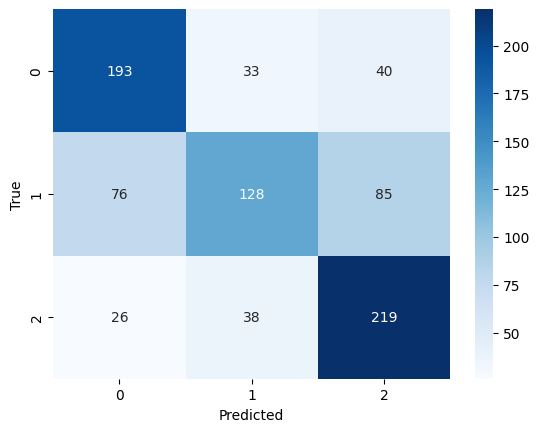

In [14]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = cityblock_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Minkowski:

In [15]:
def minkowski_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = n, 
                          metric='minkowski').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.847255369928401
              precision    recall  f1-score   support

        CPSZ       0.84      0.88      0.86       266
        FNSZ       0.88      0.78      0.83       289
        GNSZ       0.83      0.89      0.86       283

    accuracy                           0.85       838
   macro avg       0.85      0.85      0.85       838
weighted avg       0.85      0.85      0.85       838



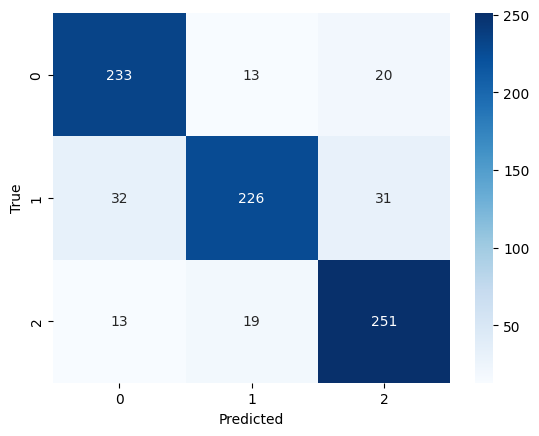


Nilai n =  3
Accuracy: 0.7386634844868735
              precision    recall  f1-score   support

        CPSZ       0.74      0.82      0.78       266
        FNSZ       0.76      0.55      0.64       289
        GNSZ       0.72      0.85      0.78       283

    accuracy                           0.74       838
   macro avg       0.74      0.74      0.73       838
weighted avg       0.74      0.74      0.73       838



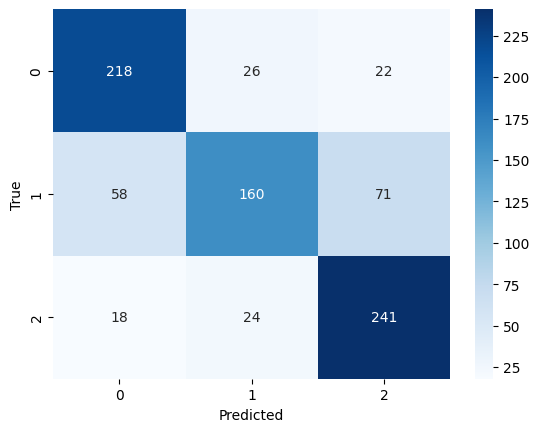


Nilai n =  5
Accuracy: 0.698090692124105
              precision    recall  f1-score   support

        CPSZ       0.70      0.80      0.75       266
        FNSZ       0.70      0.51      0.59       289
        GNSZ       0.69      0.80      0.74       283

    accuracy                           0.70       838
   macro avg       0.70      0.70      0.69       838
weighted avg       0.70      0.70      0.69       838



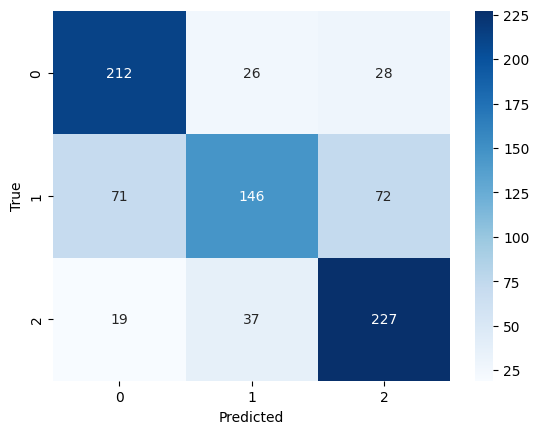


Nilai n =  7
Accuracy: 0.652744630071599
              precision    recall  f1-score   support

        CPSZ       0.66      0.73      0.70       266
        FNSZ       0.64      0.48      0.55       289
        GNSZ       0.65      0.76      0.70       283

    accuracy                           0.65       838
   macro avg       0.65      0.66      0.65       838
weighted avg       0.65      0.65      0.65       838



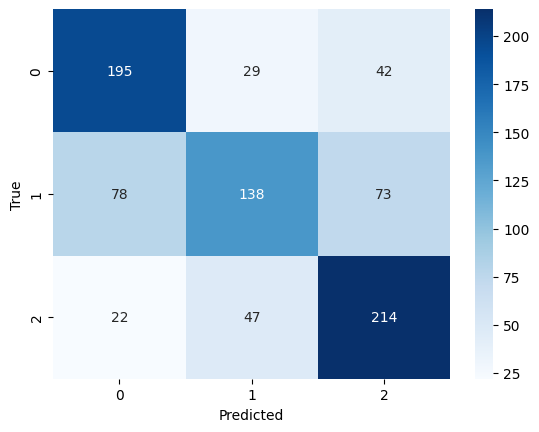


Nilai n =  9
Accuracy: 0.6431980906921241
              precision    recall  f1-score   support

        CPSZ       0.66      0.73      0.69       266
        FNSZ       0.63      0.45      0.52       289
        GNSZ       0.64      0.76      0.69       283

    accuracy                           0.64       838
   macro avg       0.64      0.65      0.64       838
weighted avg       0.64      0.64      0.63       838



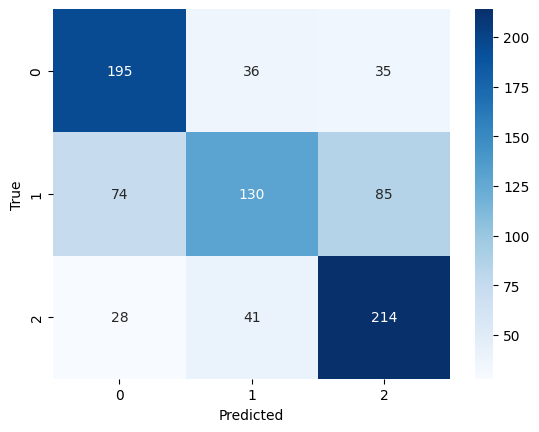

In [16]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = minkowski_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()

## Correlation:

In [17]:
def correlation_knn(X_train,y_train,X_test,y_test,n):
  # training a KNN classifier
  from sklearn.neighbors import KNeighborsClassifier
  import scipy
  knn = KNeighborsClassifier(n_neighbors = n, 
                        metric='correlation').fit(X_train, y_train)
    
  # accuracy on X_test
  print("Accuracy:", knn.score(X_test, y_test))
    
  # creating a confusion matrix
  knn_predictions = knn.predict(X_test) 
  cm = confusion_matrix(y_test, knn_predictions)
  return knn_predictions,cm

Nilai n =  1
Accuracy: 0.3221957040572792
              precision    recall  f1-score   support

        CPSZ       0.21      0.05      0.07       266
        FNSZ       0.26      0.02      0.03       289
        GNSZ       0.33      0.89      0.48       283

    accuracy                           0.32       838
   macro avg       0.27      0.32      0.20       838
weighted avg       0.27      0.32      0.20       838



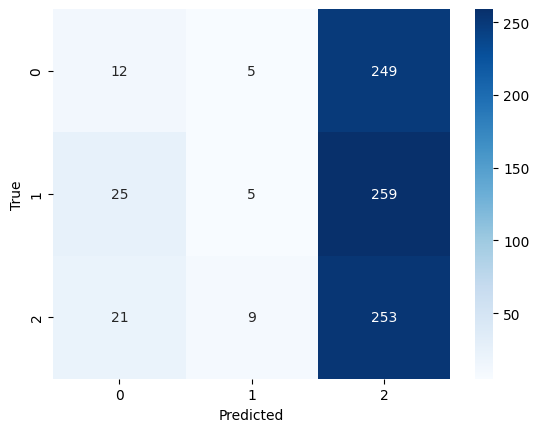


Nilai n =  3
Accuracy: 0.36634844868735084
              precision    recall  f1-score   support

        CPSZ       0.38      0.36      0.37       266
        FNSZ       0.38      0.02      0.04       289
        GNSZ       0.36      0.72      0.48       283

    accuracy                           0.37       838
   macro avg       0.37      0.37      0.30       838
weighted avg       0.37      0.37      0.29       838



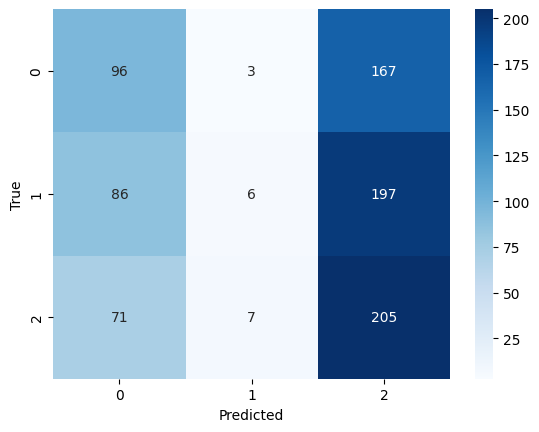


Nilai n =  5
Accuracy: 0.3233890214797136
              precision    recall  f1-score   support

        CPSZ       0.32      0.53      0.40       266
        FNSZ       0.35      0.24      0.29       289
        GNSZ       0.30      0.21      0.25       283

    accuracy                           0.32       838
   macro avg       0.33      0.33      0.31       838
weighted avg       0.33      0.32      0.31       838



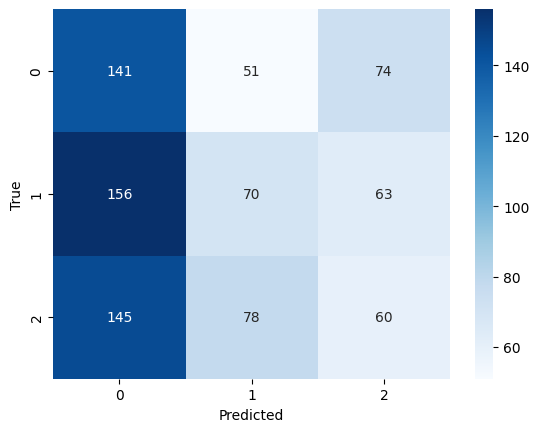


Nilai n =  7
Accuracy: 0.3305489260143198
              precision    recall  f1-score   support

        CPSZ       0.33      0.50      0.40       266
        FNSZ       0.33      0.24      0.28       289
        GNSZ       0.33      0.27      0.30       283

    accuracy                           0.33       838
   macro avg       0.33      0.33      0.32       838
weighted avg       0.33      0.33      0.32       838



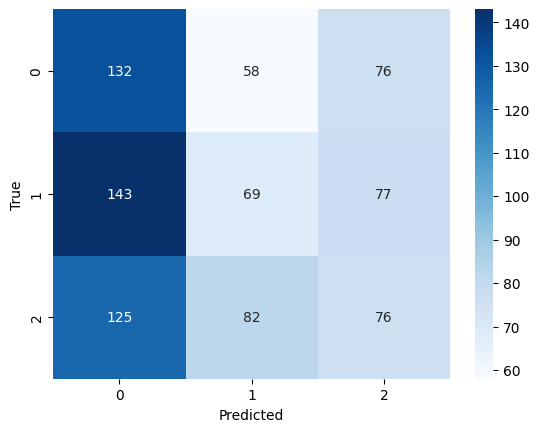


Nilai n =  9
Accuracy: 0.32100238663484487
              precision    recall  f1-score   support

        CPSZ       0.31      0.48      0.38       266
        FNSZ       0.31      0.22      0.26       289
        GNSZ       0.35      0.27      0.30       283

    accuracy                           0.32       838
   macro avg       0.32      0.32      0.31       838
weighted avg       0.32      0.32      0.31       838



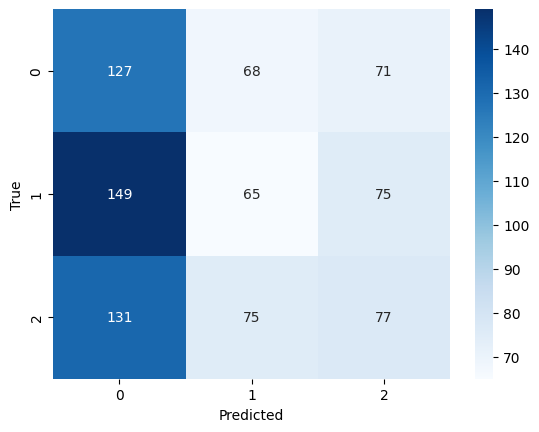

In [18]:
n = [1,3,5,7,9]
for i in n:
  print("Nilai n = ",str(i))
  knn_predictions,cm = correlation_knn(X_train,y_train,X_test,y_test,i)
  from sklearn.metrics import classification_report
  print(classification_report(y_test, knn_predictions, target_names=le_name_mapping.keys()))

  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  print("============================================")
  print()